In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station



In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('station')

for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
columns = inspector.get_columns('measurement')

for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Query all rows from the measurement table
results = session.query(station.station, station.name,\
                        station.latitude, station.longitude, station.elevation).all()


# Convert the results to a DataFrame for better display
df1 = pd.DataFrame(results, columns=['station', 'name', \
                                    'latitude', 'longitude', 'elevation'])

# Display the DataFrame
df1.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [12]:
# Query all rows from the measurement table
results = session.query(measurement.station, measurement.date, measurement.prcp, measurement.tobs).all()

# Convert the results to a DataFrame for better display
df2 = pd.DataFrame(results, columns=['station', 'date', 'prcp', 'tobs'])

# Display the DataFrame
df2.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(measurement.date)).scalar()
# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')\
- dt.timedelta(days=356)
most_recent_date

'2017-08-23'

In [15]:
# Perform a query to retrieve the data and precipitation scores
precuoutation_data = session.query(measurement.date, measurement.prcp)\
.filter(measurement.date >= one_year_ago)\
.filter(measurement.date <= most_recent_date).all()
precuoutation_data

[('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 0.0),
 ('2016-10-09', 0.0),
 ('2016-10-10', 0.0),
 ('2016-10-11', 0.0),
 ('2016-10-12', 0.0),
 ('2016-10-13', 0.0),
 ('2016-10-14', 0.0),
 ('2016-10-15', 0.0),
 ('2016-10-16', 0.

In [16]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df3 = pd.DataFrame(precuoutation_data, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
df3 = df3.sort_values(by='Date')

# Remove rows with NaN values in the "Precipitation" column
#df3 = df3.dropna(subset=['Precipitation'])

# Display the updated DataFrame
df3.head()

,Date,Precipitation
0,2016-09-02,0.00
980,2016-09-02,NaN
1483,2016-09-02,0.01
684,2016-09-02,0.19
1825,2016-09-02,0.03


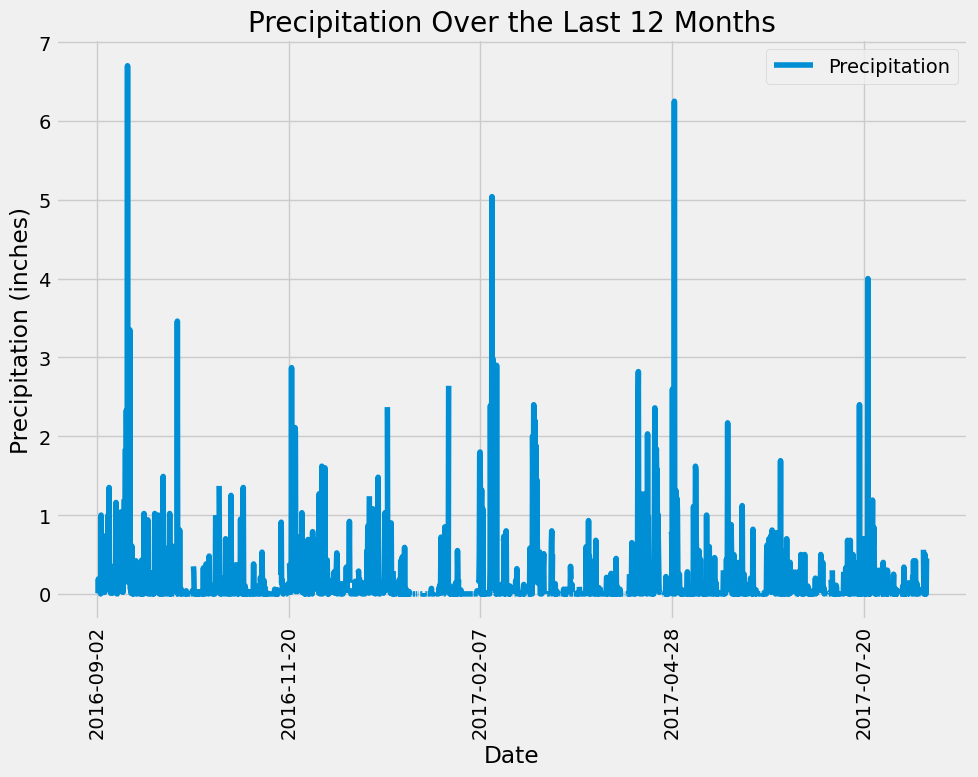

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
df3.plot( x = 'Date', y = 'Precipitation', figsize = (10,8), rot = 90)
plt.title("Precipitation Over the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.tight_layout()
plt.show()

In [18]:
print(df3.columns)

Index(['Date', 'Precipitation'], dtype='object')


In [19]:
summary_stats = df3['Precipitation'].describe()

summary_df = pd.DataFrame(summary_stats, columns=['Precipitation'])
summary_df

,Precipitation
count,1963.000000
mean,0.171900
std,0.452315
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
#  Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(station.station))).scalar()
total_stations

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(station.station, func.count(measurement.station))\
    .filter(station.station == measurement.station)\
    .group_by(station.station).order_by(func.count(measurement.station).desc()).all()

most_active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query
# Get the most active station ID from the previous query
most_active_station_id = most_active_stations[0][0]

# calculate the lowest, highest, and average temperature.
temp_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs)\
                          , func.avg(measurement.tobs))\
    .filter(measurement.station == most_active_station_id ).all()

temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Query the last 12 months of temperature observation data for this station 

temp_data = session.query(measurement.date, measurement.tobs)\
    .filter(measurement.station == most_active_station_id)\
    .filter(measurement.date >= one_year_ago).all()

temp_df = pd.DataFrame(temp_data, columns = ["Data","Temperature"])
temp_df

,Data,Temperature
0,2016-09-02,80.0
1,2016-09-03,78.0
2,2016-09-04,78.0
3,2016-09-05,78.0
4,2016-09-06,73.0
...,...,...
337,2017-08-14,77.0
338,2017-08-15,77.0
339,2017-08-16,76.0
340,2017-08-17,76.0


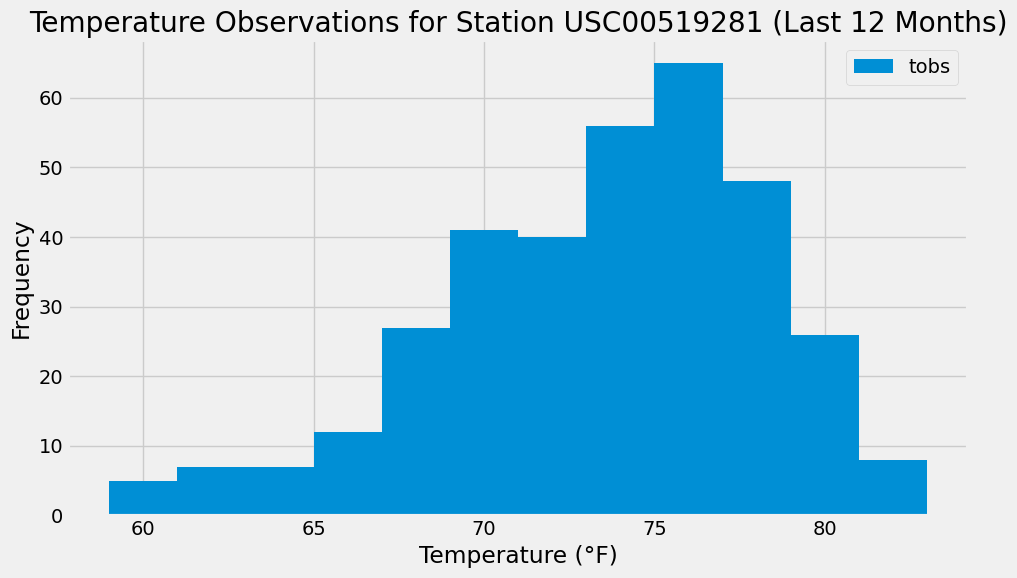

In [24]:
# plot the results as a histogram
plt.figure(figsize = (10,6))
plt.hist(temp_df['Temperature'], bins=12, label='tobs')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station_id} (Last 12 Months)')
plt.legend()
plt.tight_layout()
plt.show()

# Close Session